### Ujian Modul 3

## Machine Learning Exam (Bank.csv) - Brandon Lotus

### Defining Problem

Semakin majunya bisnis perbankan bukan hanya meningkatkan opportunity tiap bank namun juga terdapat permasalahan yang timbul oleh karena persaingan bisnis. Salah satu permasalahan adalah kemungkinan nasabah bank untuk pindah ke fasilitas perbankan lain (https://www.ipsos.com/en-us/23-banking-customers-are-high-value-and-risk-leaving-their-financial-institution)

Apabila nasabah pindah bank, bukan hanya uang nasabah ikut berpindah juga dibutuhkan cost dalam marketing, promosi dan lain-lain untuk mendapatkan nasabah baru. Oleh karena kehilangan uang dan juga tambahan cost yang besar, sangat penting untuk mempertahankan nasabah sebuah bank.

Dalam kasus ini sebuah bank X juga mengalami permasalahan diatas, dimana sekitar 20% nasabahnya meninggalkan bank tersebut.

In [50]:
df['Exited'].value_counts()/len(df)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

### Defining Project Goals

Untuk mengatasi permasalahan di atas, tim DS bank X ditugaskan untuk menganalisa faktor-faktor nasabah yang pindah bank menggunakan feature dan data dalam dataset.

Hasil analisa tersebut diharapkan dapat digunakan untuk membuat suatu model machine learning yang dapat memprediksi apakah seorang nasabah akan pindah bank atau tidak.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describe Data

In [4]:
# Mengetahui jumlah keseluruhan data (14 kolom dan 10000 baris data)
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
# Mendeskripsi tiap kolom, mengidentifikasi fitur-fitur untuk analisa data dan tipe datanya
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [9]:
pd.DataFrame(data = bankDesc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )
# Terdapat 13 features dengan kolom Exited sebagai kolom target yang menentukan pindahnya nasabah
# Terdapat 3 features dengan tipe data object (Surname, Geography dan Gender)
# Terdapat 10 features dengan tipe data numerikal, namun beberapa features digunakan secara kategorik seperti IsActiveMember dan HasCrCard

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,RowNumber,int64,0,0.0,10000,"[3053, 5743]"
1,CustomerId,int64,0,0.0,10000,"[15727619, 15752375]"
2,Surname,object,0,0.0,2932,"[Gray, Yermakova]"
3,CreditScore,int64,0,0.0,460,"[809, 837]"
4,Geography,object,0,0.0,3,"[Germany, Spain]"
5,Gender,object,0,0.0,2,"[Male, Female]"
6,Age,int64,0,0.0,70,"[31, 56]"
7,Tenure,int64,0,0.0,11,"[7, 9]"
8,Balance,float64,0,0.0,6382,"[139625.34, 111920.13]"
9,NumOfProducts,int64,0,0.0,4,"[1, 4]"


In [11]:
# Mengidentifikasi missing value dalam dataset
df.isna().sum()
# Tidak ada missing value dalam dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Handling Outiers

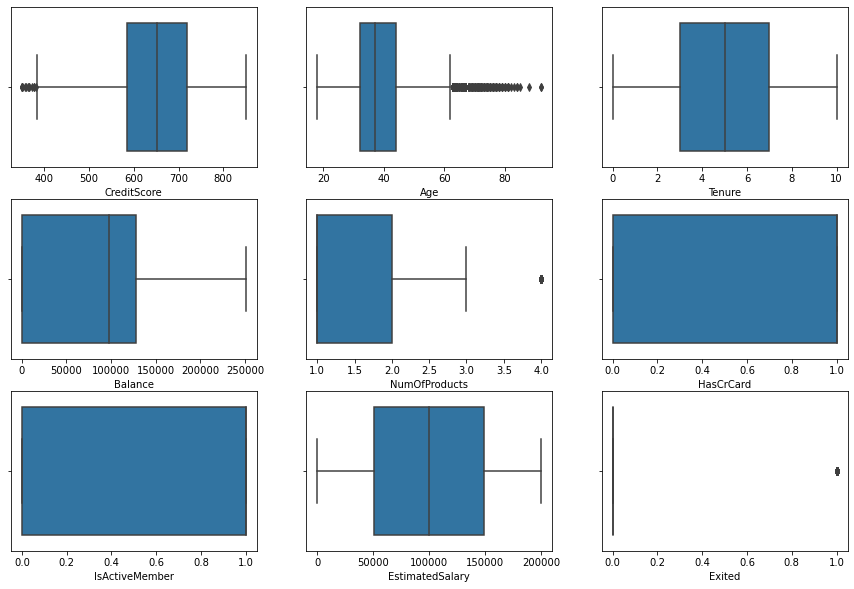

In [21]:
# Melihat outliers dengan boxplot
df_box = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname','Geography', 'Gender'])
plt.figure(figsize = (15, 10))
x = 1      
for i in df_box.describe():
    plt.subplot(3,3,x)
    sns.boxplot(df[i])
    x += 1
# Ada outliers di kolom CreditScore, Age dan NumOfProducts

In [16]:
# Outliers Credit Score
Q1_cs = df.describe()['CreditScore']['25%']
Q3_cs = df.describe()['CreditScore']['75%']
IQR_cs = Q3_cs - Q1_cs
Upper_Fence_cs = Q3_cs + (1.5 * IQR_cs)
Lower_Fence_cs = Q1_cs - (1.5 * IQR_cs)
out_cs = df[(df['CreditScore'] < Lower_Fence_cs) | (df['CreditScore'] > Upper_Fence_cs)]
print(f'Upper Fence Credit Score: {Upper_Fence_cs}')
print(f'Lower Fence Credit Score: {Lower_Fence_cs}')
print(f'Jumlah Outliers Credit Score: {len(out_cs)}')

Upper Fence Credit Score: 919.0
Lower Fence Credit Score: 383.0
Jumlah Outliers Credit Score: 15


In [19]:
# Outliers Age
Q1_a = df.describe()['Age']['25%']
Q3_a = df.describe()['Age']['75%']
IQR_a = Q3_a - Q1_a
Upper_Fence_a = Q3_a + (1.5 * IQR_a)
Lower_Fence_a = Q1_a - (1.5 * IQR_a)
out_a = df[(df['Age'] < Lower_Fence_a) | (df['Age'] > Upper_Fence_a)]
print(f'Upper Fence Age: {Upper_Fence_a}')
print(f'Lower Fence Age: {Lower_Fence_a}')
print(f'Jumlah Outliers Age: {len(out_a)}')

Upper Fence Age: 62.0
Lower Fence Age: 14.0
Jumlah Outliers Age: 359


In [23]:
# Outliers NumOfProducts
Q1_np = df.describe()['NumOfProducts']['25%']
Q3_np = df.describe()['NumOfProducts']['75%']
IQR_np = Q3_np - Q1_np
Upper_Fence_np = Q3_np + (1.5 * IQR_np)
Lower_Fence_np = Q1_np - (1.5 * IQR_np)
out_np = df[(df['NumOfProducts'] < Lower_Fence_np) | (df['NumOfProducts'] > Upper_Fence_np)]
print(f'Upper Fence NumOfProducts: {Upper_Fence_np}')
print(f'Lower Fence NumOfProducts: {Lower_Fence_np}')
print(f'Jumlah Outliers NumOfProducts: {len(out_np)}')

Upper Fence NumOfProducts: 3.5
Lower Fence NumOfProducts: -0.5
Jumlah Outliers NumOfProducts: 60


### Data Analysis

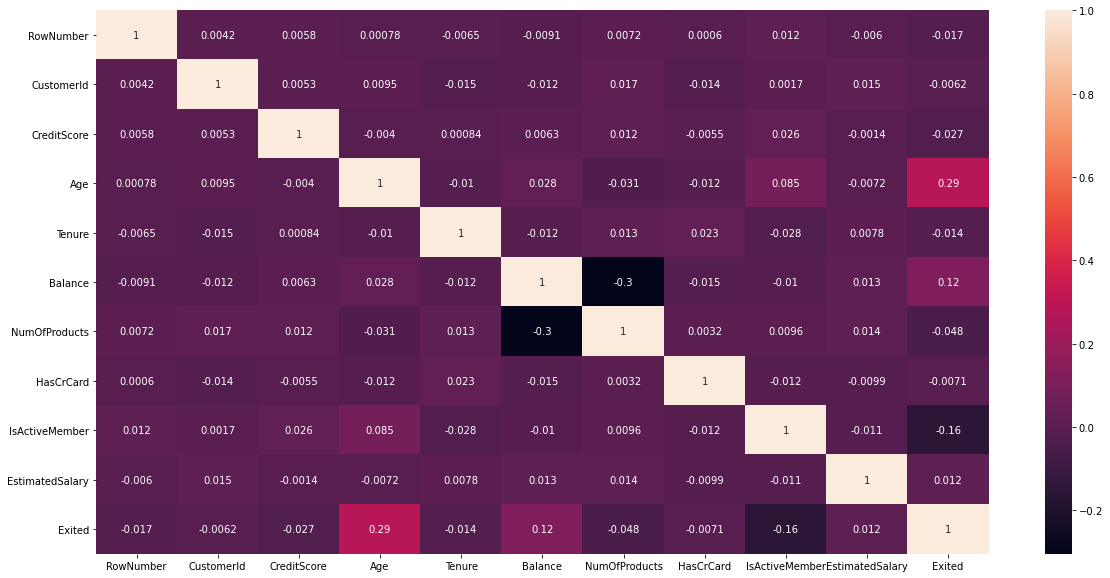

In [28]:
# Melihat korelasi antar features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
# Melihat korelasi features dengan target Exited
kor = df.corr()
kor['Exited'].sort_values(ascending = False)[1:]
# Feature dengan korelasi tertinggi adalah Age
# Features dengan korelasi positif hanya Age, Balance dan EstimatedSalary (berbanding lurus)
# Features lain memiliki korelasi negatif (berbanding terbalik)

Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [25]:
# Melihat perbandingan jumlah customer yang pindah bank
df['Exited'].value_counts()
# 0 = Tidak pindah
# 1 = Pindah

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
# Melihat perbandingan dari Surname customer
df['Surname'].value_counts()
# Terbanyak customer dengan Surname Smith

Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Hare        1
Fabro       1
Cawker      1
Barwell     1
Beyer       1
Name: Surname, Length: 2932, dtype: int64

In [37]:
# Perbandingan nasabah pindah (Exited) dari faktor gendernya (Male & Female)
df.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [40]:
# Perbandingan nasabah pindah (Exited) dari faktor geografinya
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [43]:
# Perbandingan nasabah pindah (Exited) dari faktor member aktif
df.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [44]:
# Perbandingan nasabah pindah (Exited) dari faktor memiliki kartu kredit
df.groupby('HasCrCard')['Exited'].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

### Data Visualization & Insight

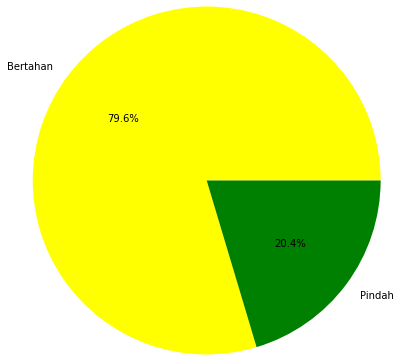

In [47]:
# Visualisasi persentase nasabah pindah dan bertahan
persentase = df.Exited.value_counts().values
nama = ['Bertahan','Pindah']
plt.pie(persentase, labels=nama,
        colors= ['yellow','green'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 2)
plt.show()
# Dapat dilihat bahwa dari data, nasabah yang pindah sebanyak 20.4% dan yang tetap bertahan 79.6%

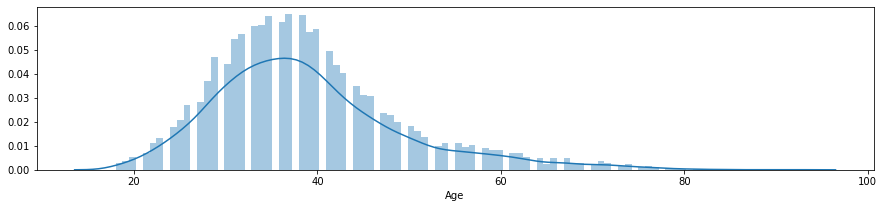

In [49]:
# Visualisasi persebaran umur
plt.figure(figsize=(15,3))
sns.distplot(df['Age'], bins=100)
plt.show()
# Dapat dilihat dari persebaran usia diatas, nasabah terbanyak di rentang usia 30-40 tahun

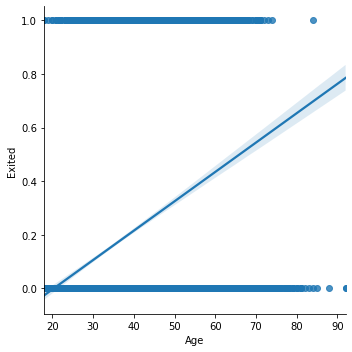

In [39]:
# Perbandingan nasabah pindah (Exited) dari faktor usia (Age)
sns.lmplot(x = 'Age', y = 'Exited', data=df)
plt.show()
# Semakin tua umur nasabah, semakin tinggi kemungkinan nasabah tersebut untuk pindah bank (berbanding lurus)

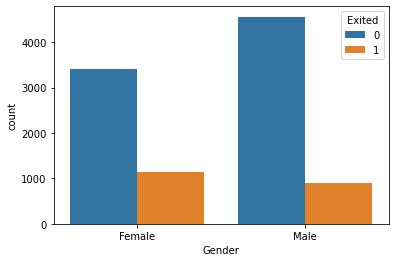

In [38]:
# Perbandingan nasabah pindah (Exited) dari faktor gendernya (Male & Female)
sns.countplot(x = 'Gender', hue = 'Exited', data = df)
plt.show()
# Nasabah laki-laki lebih banyak dari wanita
# Dari sisi perbandingan nasabah yang pindah, nasabah wanita memiliki tingkat kemungkinan yang lebih tinggi daripada laki-laki

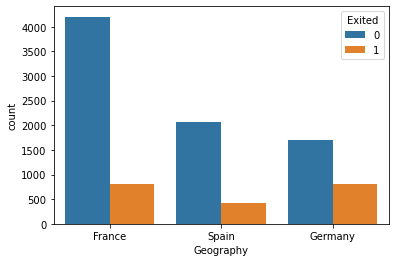

In [41]:
# Perbandingan nasabah pindah (Exited) dari faktor geografinya
sns.countplot(x = 'Geography', hue = 'Exited', data = df)
plt.show()
# Kebanyakan nasabah berasal di Perancis, diikuti dengan Spanyol dan Jerman
# Dapat dilihat bahwa perbandingan nasabah yang pindah di Jerman lebih tinggi daripada Perancis dan Spanyol

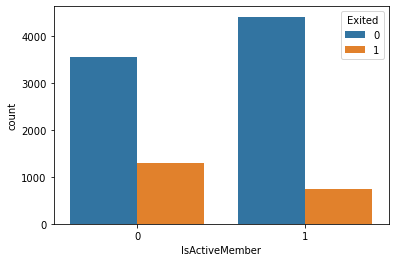

In [42]:
# Perbandingan nasabah pindah (Exited) dari faktor member aktif
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df)
plt.show()
# Nasabah yang merupakan member aktif lebih banyak daripada yang bukan
# Tabel juga menunjukkan nasabah yang bukan member aktif lebih tinggi kemungkinan untuk pindah bank

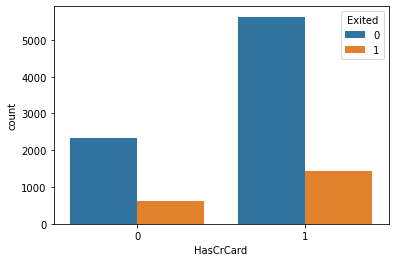

In [45]:
# Perbandingan nasabah pindah (Exited) dari faktor memiliki kartu kredit
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df)
plt.show()
# Nasabah yang memiliki kartu kredit lebih banyak daripada yang tidak
# Perbandingan nasabah yang pindah bank dari segi kepemilikan kartu kredit cenderung sebanding